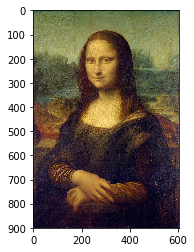

In [3]:
# Q2-a: Load Image
# Reference: https://www.geeksforgeeks.org/reading-images-in-python/
import matplotlib.image as mpimg
import numpy as np
from matplotlib import pylab as plt

image_rgb = mpimg.imread('MonaLisa.jpg')
plt.imshow(image_rgb)
plt.show()

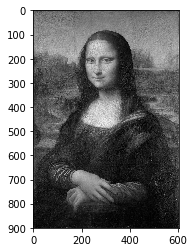

In [4]:
# Q2-c: Preprocessing the output (Convert the image to grayscale)
# Reference - https://stackoverflow.com/questions/12201577/how-can-i-convert-an-rgb-image-into-grayscale-in-python\
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

image_gray = rgb2gray(image_rgb)
plt.imshow(image_gray, cmap = plt.get_cmap('gray'))
plt.show()

In [5]:
# Q2-b: Preprocessing the input to build “training set,” uniformly sample 5,000 random (x, y) coordinate locations.
# Reference: https://www.geeksforgeeks.org/python-randint-function/
from random import randint

width = image_gray.shape[1]
height = image_gray.shape[0]

brightnesses = []
ran_coordinates = []
for i in range(5000):
    w = randint(0, width-1)
    h = randint(0, height-1)
    brightness = image_gray[h, w]
    brightnesses.append(brightness)
    ran_coordinates.append([h, w])

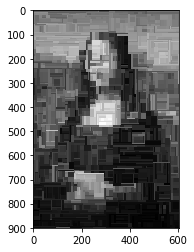

In [6]:
# Q2-d: Build the final image.
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
from sklearn.ensemble import RandomForestRegressor

# Get all coordinates for 5000 random(x, y) coordinates.
all_coordinates=[]
for h in range(height):
    for w in range (width):
        all_coordinates.append((h, w))

# Build an image according to the # of trees and depth.
def buildImage(num_trees=1, depth=None):
    rfr = RandomForestRegressor(n_estimators=num_trees, max_depth=depth)
    rfr.fit(ran_coordinates, brightnesses)
    prediction = rfr.predict(all_coordinates)
    plt.imshow(np.array(prediction).reshape(height, width), cmap="gray")
    plt.show()

buildImage()

Depths: 1


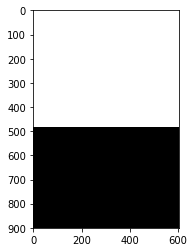

Depths: 2


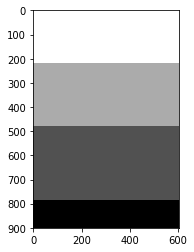

Depths: 3


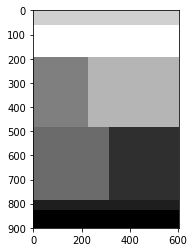

Depths: 5


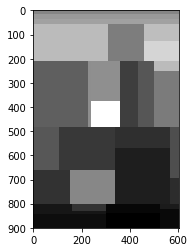

Depths: 10


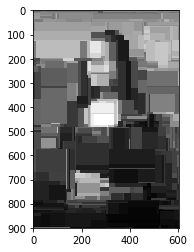

Depths: 15


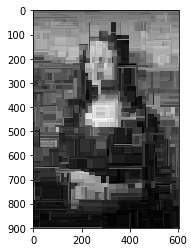

In [7]:
# Q2-e(i): Repeat the experiment for a random forest containing a single decision tree, but with depths 1, 2, 3, 5, 10, and 15.
depths = [1, 2, 3, 5, 10, 15]
for depth in depths:
    print('Depths: ' + str(depth))
    buildImage(1, depth)

Depth: 7, Number of trees: 1


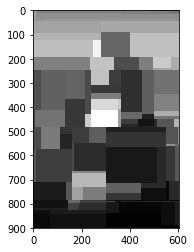

Depth: 7, Number of trees: 3


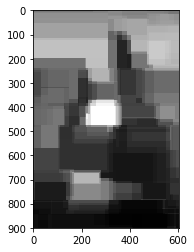

Depth: 7, Number of trees: 5


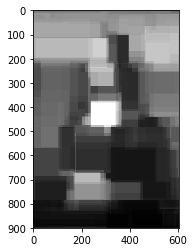

Depth: 7, Number of trees: 10


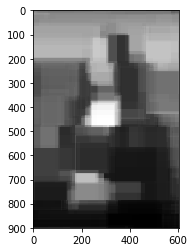

Depth: 7, Number of trees: 100


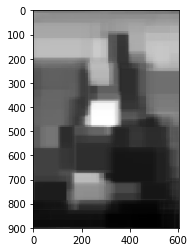

In [8]:
# Q2-e(ii): Repeat the experiment for a random forest of depth 7, but with number of trees equal to 1, 3, 5, 10, and 100.
depth = 7
trees = [1, 3, 5, 10, 100]
for tree in trees:
    print('Depth: ' + str(depth) + ', Number of trees: ' + str(tree))
    buildImage(tree, depth)

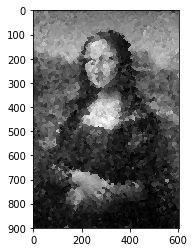

In [9]:
# Q2-e(iii): Repeat the experiment using a k-NN regressor, for k = 1
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing

# Rounding a list of floats into integers.
new_brightness = [round(x) for x in brightnesses]

# Perform KNN with k=1.
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(ran_coordinates, new_brightness)
prediction = knn.predict(all_coordinates)
plt.imshow(np.array(prediction).reshape(height, width), cmap="gray")
plt.show()